In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df_num=df.select_dtypes(include=[np.number])
df_cat=df.select_dtypes(include=['object'])

In [9]:
df_cat.describe(include='all')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
#Imputations

In [11]:
df_num.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [12]:
print(df_num['LotFrontage'].mean())
print(df_num['LotFrontage'].median())

70.04995836802665
69.0


In [13]:
for col in ["LotFrontage"]:
    df_num[col] = df_num[col].fillna(df_num[col].median())


In [14]:
df_num.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
HalfBath          0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
BedroomAbvGr      0
FullBath          0
MSSubClass        0
BsmtHalfBath      0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
SalePrice         0
dtype: int64

In [15]:
for col in ["PoolQC"]:
    df_cat[col].fillna('No Value',inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7136\1161263546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat[col].fillna('No Value',inplace=True)


In [16]:
for col in ["GarageCond",]:
    df_cat[col].fillna(df_cat[col].value_counts().idxmax(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7136\1075783591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat[col].fillna(df_cat[col].value_counts().idxmax(),inplace=True)


In [17]:
for col in ["PoolQC","MiscFeature","Alley","Fence"]:
   df_cat[col] = df_cat[col].fillna('No Value')


In [18]:
for col in ["MasVnrType","FireplaceQu","GarageType","GarageQual","GarageFinish","BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtQual","BsmtCond","Electrical"]:
    for col in df_cat.columns:
        mode_val = df_cat[col].value_counts().idxmax()
        df_cat[col] = df_cat[col].fillna(mode_val)


In [19]:
df_cat.isnull().sum().sort_values(ascending=False)

MSZoning         0
FireplaceQu      0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
BsmtCond         0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
BsmtExposure     0
BsmtQual         0
Street           0
Condition2       0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
Foundation       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
SaleCondition    0
dtype: int64

In [20]:
for col in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
    df_num[col] = df_num[col].fillna(df_num[col].median())


In [21]:
# Correlationship between numerical columns and numerical targetz

In [22]:
df_num_corr=df_num.corr()

In [23]:
df_num_corr["SalePrice"]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.334771
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.466754
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [24]:
df_num_cols = []
df_num_cols.extend(df_num_corr[(df_num_corr["SalePrice"]>0.3)].index.values)
df_num_cols.extend(df_num_corr[(df_num_corr["SalePrice"]<-0.3) ].index.values)

In [25]:
df_num_cols

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [26]:

#Correlationship between categorical columns and continous target variable using one way ANNOVA

In [27]:
from scipy.stats import f_oneway

In [28]:
df_cat['sp']=df_num['SalePrice']

In [29]:
groups = [df_cat['sp'][df_cat['BsmtExposure'] == category] for category in df_cat['BsmtExposure'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 76.57793447709939, P-value: 5.39423843153302e-46


In [30]:
c_list=[]
nc_list=[]
for c1 in list(df_cat.columns):
    if c1 == 'sp':
        continue
    else:
        groups = [df_cat['sp'][df_cat[c1] == category] for category in df_cat[c1].unique()]
        f_stat, p_value = f_oneway(*groups)
        print(f"column : {c1}, F-statistic: {f_stat}, P-value: {p_value}")
        if p_value < 0.05:
            c_list.append(c1)
        else:
            nc_list.append(c1)

column : MSZoning, F-statistic: 43.84028167245718, P-value: 8.817633866272648e-35
column : Street, F-statistic: 2.4592895583691994, P-value: 0.11704860406782483
column : Alley, F-statistic: 15.176613889987992, P-value: 2.9963796805460783e-07
column : LotShape, F-statistic: 40.13285166226295, P-value: 6.447523852011766e-25
column : LandContour, F-statistic: 12.850188333283924, P-value: 2.7422167521379096e-08
column : Utilities, F-statistic: 0.29880407484898486, P-value: 0.5847167739689381
column : LotConfig, F-statistic: 7.809954123467792, P-value: 3.163167473604189e-06
column : LandSlope, F-statistic: 1.9588170374149438, P-value: 0.1413963584114019
column : Neighborhood, F-statistic: 71.78486512058272, P-value: 1.558600282771154e-225
column : Condition1, F-statistic: 6.118017137125925, P-value: 8.904549416138853e-08
column : Condition2, F-statistic: 2.0738986215227877, P-value: 0.043425658360948464
column : BldgType, F-statistic: 13.011077169620851, P-value: 2.0567364604967015e-10
colu

In [31]:
c_list

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [32]:
nc_list

['Street', 'Utilities', 'LandSlope']

In [33]:
df_cat1=df_cat[c_list]

In [34]:
df_cat1.columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
df_cat1.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No Value,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,Attchd,RFn,TA,TA,Y,No Value,No Value,No Value,WD,Normal
1,RL,No Value,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,...,Attchd,RFn,TA,TA,Y,No Value,No Value,No Value,WD,Normal
2,RL,No Value,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,Attchd,RFn,TA,TA,Y,No Value,No Value,No Value,WD,Normal
3,RL,No Value,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,...,Detchd,Unf,TA,TA,Y,No Value,No Value,No Value,WD,Abnorml
4,RL,No Value,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,...,Attchd,RFn,TA,TA,Y,No Value,No Value,No Value,WD,Normal


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

In [38]:
df_cat1_e=df_cat1.apply(le.fit_transform)

In [39]:
df_cat1_e.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,3,3,4,5,2,2,0,5,...,1,1,4,4,2,3,4,1,8,4
1,3,1,3,3,2,24,1,2,0,2,...,1,1,4,4,2,3,4,1,8,4
2,3,1,0,3,4,5,2,2,0,5,...,1,1,4,4,2,3,4,1,8,4
3,3,1,0,3,0,6,2,2,0,5,...,5,2,4,4,2,3,4,1,8,0
4,3,1,0,3,2,15,2,2,0,5,...,1,1,4,4,2,3,4,1,8,4


In [40]:
df_cat1.shape

(1460, 40)

In [41]:
#Onehot encoding

In [42]:
#method1

In [43]:
df_encoded = pd.get_dummies(df_cat1, columns=df_cat1.columns)

In [44]:
df_encoded.shape

(1460, 248)

In [45]:
#method2

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [48]:
encoded_array = encoder.fit_transform(df_cat1)

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(df_cat1.columns))

In [49]:
encoded_df.shape

(1460, 248)

In [50]:
#Outlier treatment IQR

In [51]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1               # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [52]:
columns_to_check = ['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice'] 

df_no_outliers = remove_outliers_iqr(df_num, columns_to_check)

print("Original DataFrame:")
print(df_num.shape)
print("\nDataFrame after Outlier Treatment:")
print(df_no_outliers.shape)

Original DataFrame:
(1460, 38)

DataFrame after Outlier Treatment:
(1033, 38)


In [53]:
df = df_no_outliers

In [54]:
#visualizations

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

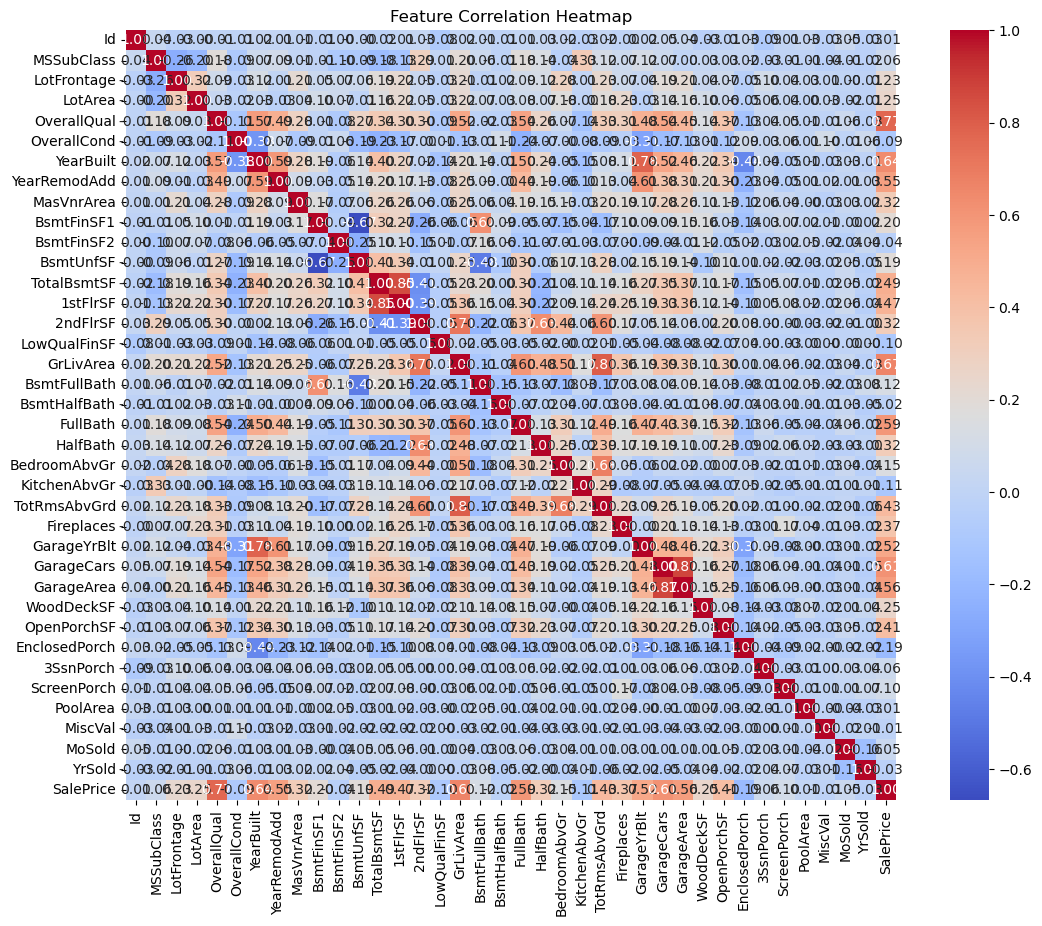

In [56]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

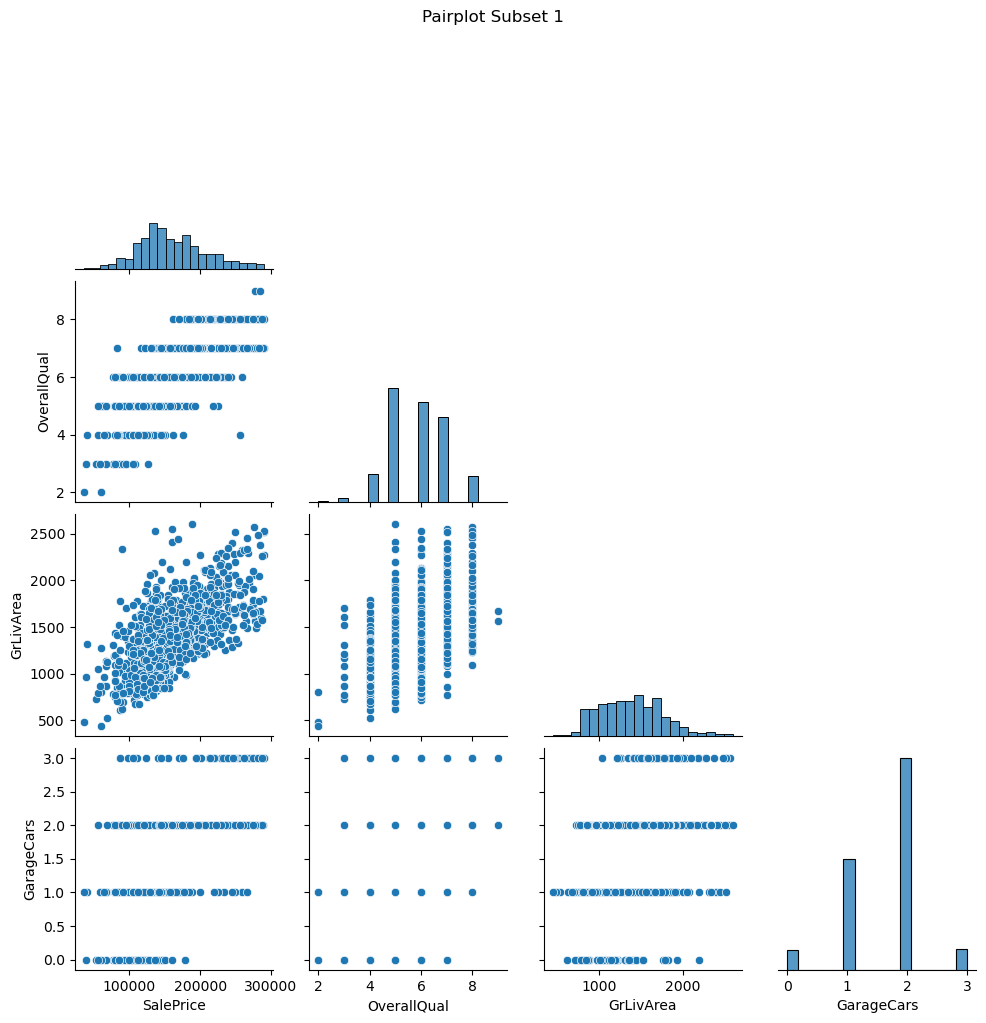

In [57]:
sns.pairplot(df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']], corner=True)
plt.suptitle("Pairplot Subset 1", y=1.02)
plt.show()

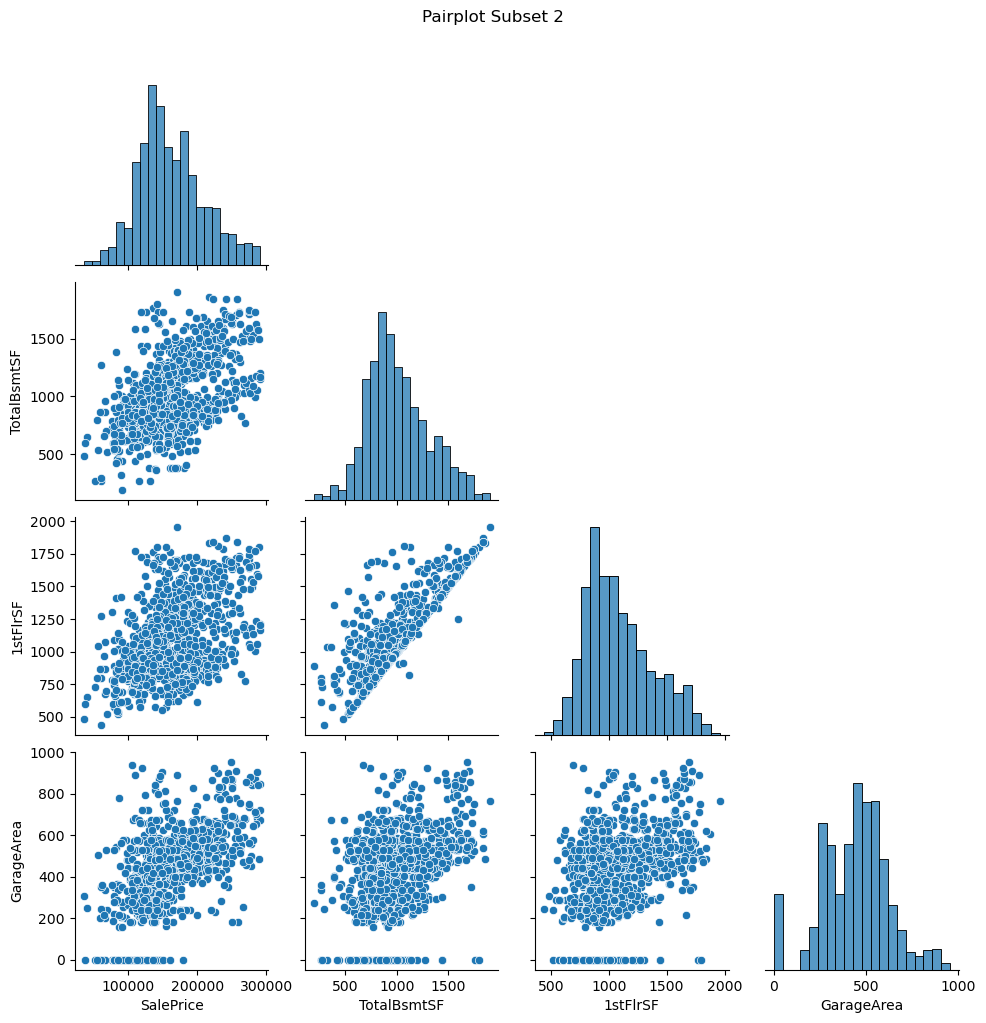

In [58]:
sns.pairplot(df[['SalePrice', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']], corner=True)
plt.suptitle("Pairplot Subset 2", y=1.02)
plt.show()

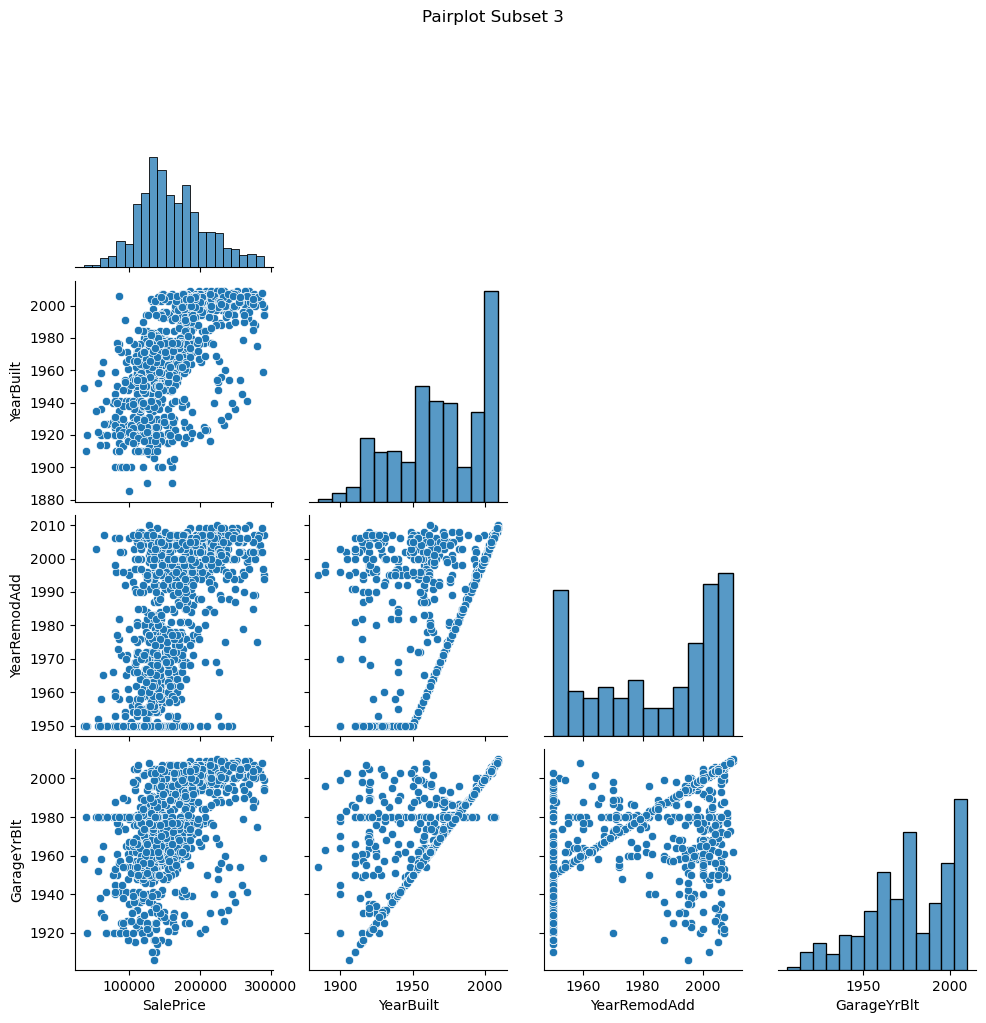

In [59]:
sns.pairplot(df[['SalePrice', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']], corner=True)
plt.suptitle("Pairplot Subset 3", y=1.02)
plt.show()

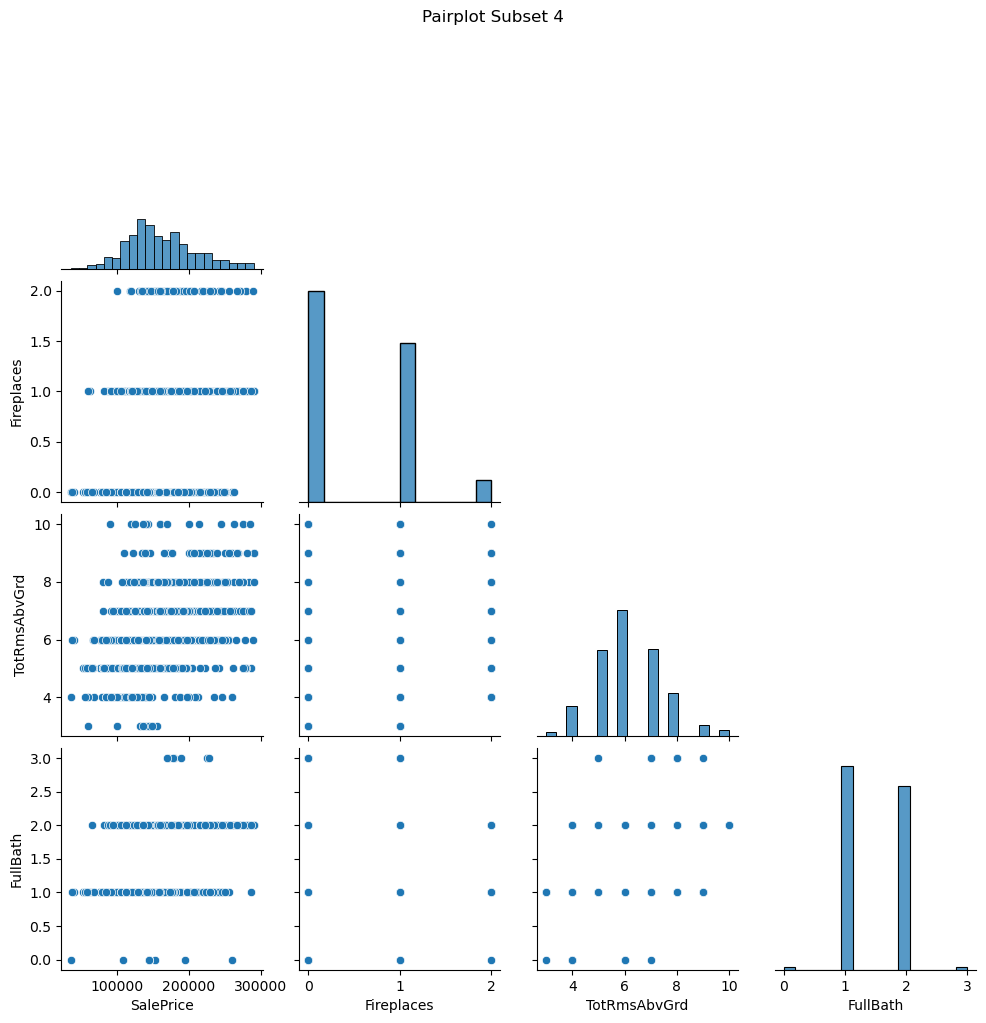

In [60]:
sns.pairplot(df[['SalePrice', 'Fireplaces', 'TotRmsAbvGrd', 'FullBath']], corner=True)
plt.suptitle("Pairplot Subset 4", y=1.02)
plt.show()


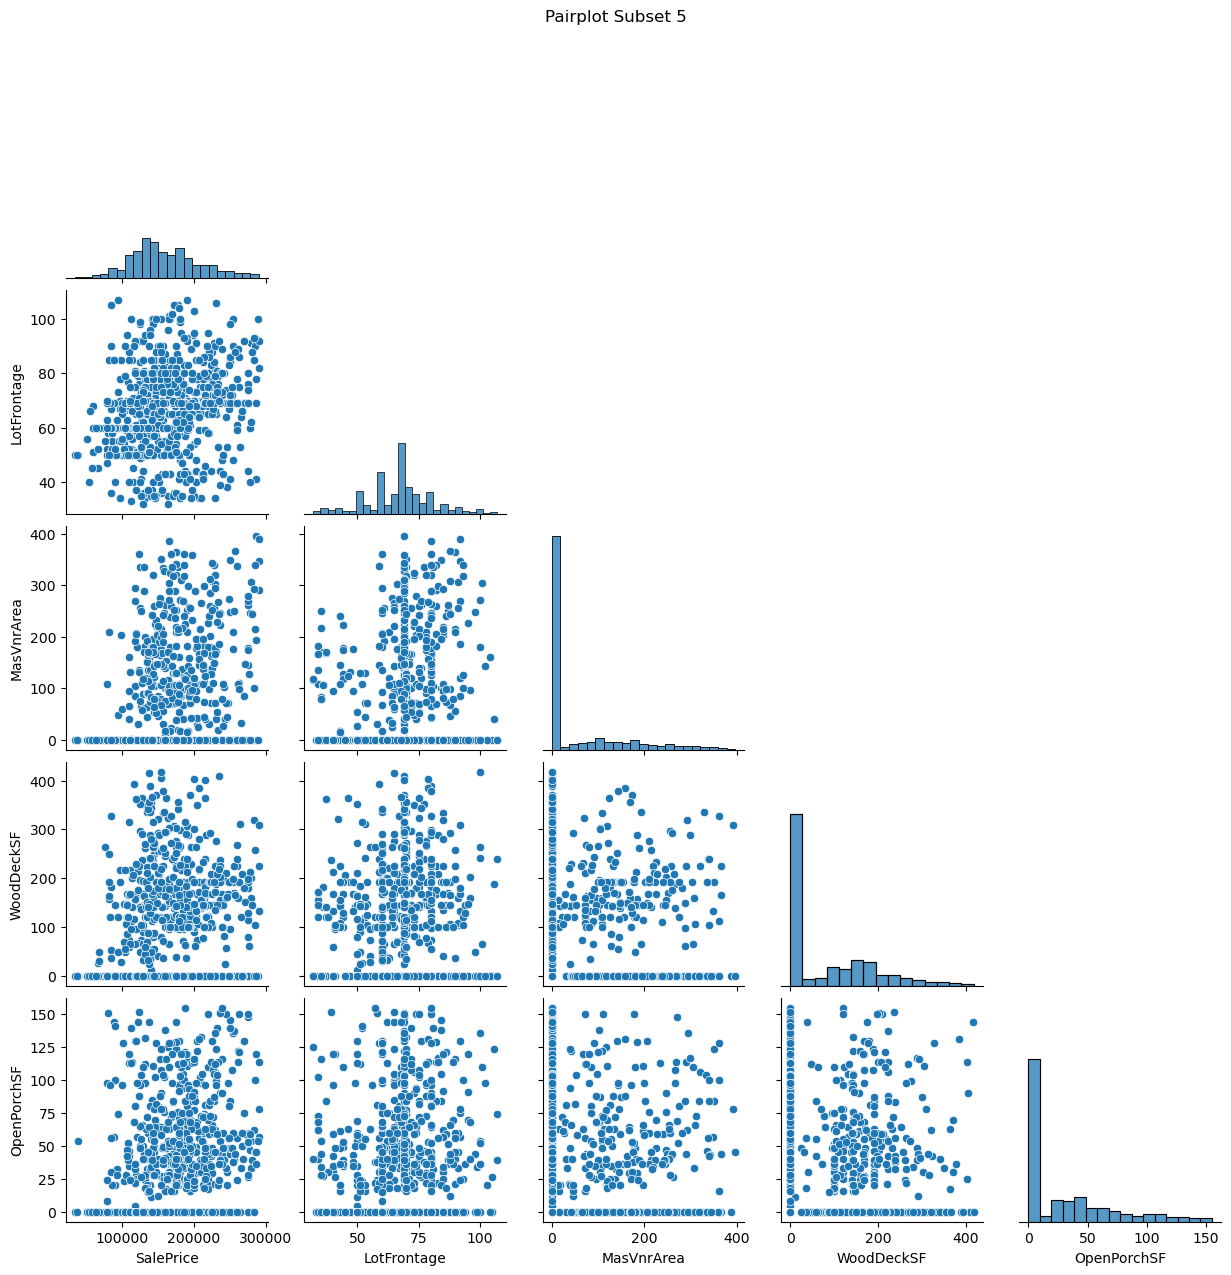

In [61]:
sns.pairplot(df[['SalePrice', 'LotFrontage', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF']], corner=True)
plt.suptitle("Pairplot Subset 5", y=1.02)
plt.show()

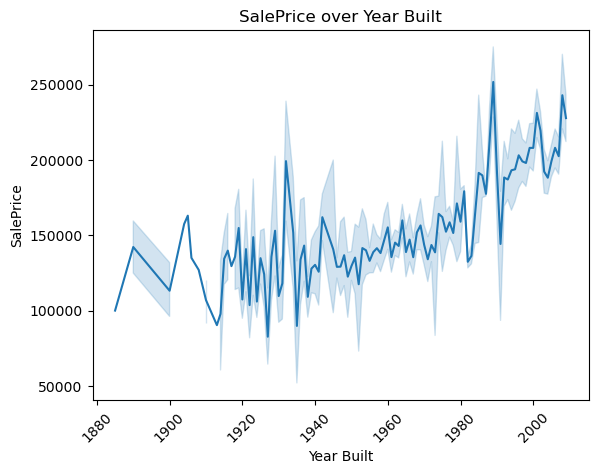

In [62]:
sns.lineplot(data=df.sort_values('YearBuilt'), x='YearBuilt', y='SalePrice')
plt.title('SalePrice over Year Built')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

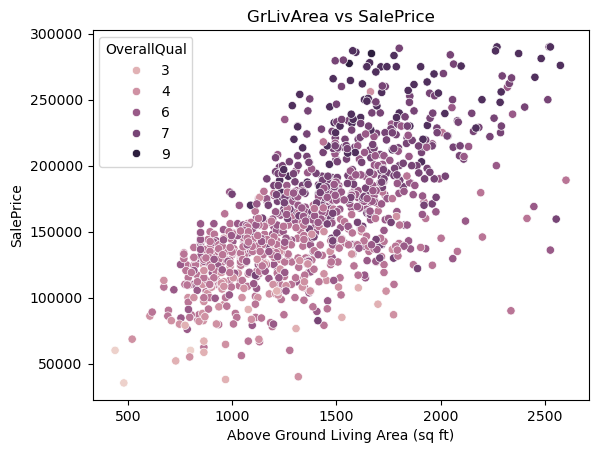

In [63]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='OverallQual')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('SalePrice')
plt.show()

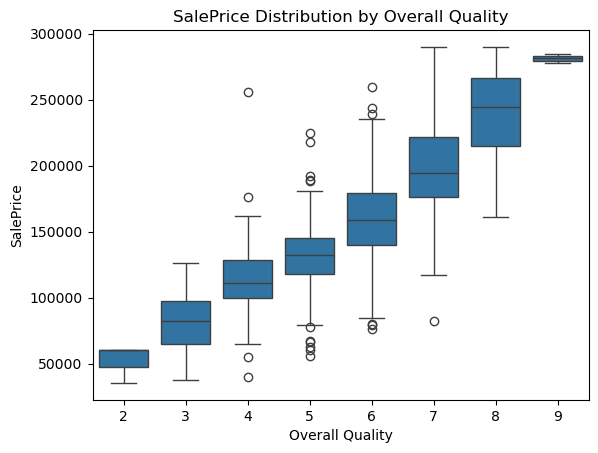

In [64]:
sns.boxplot(data=df, x='OverallQual', y='SalePrice')
plt.title('SalePrice Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

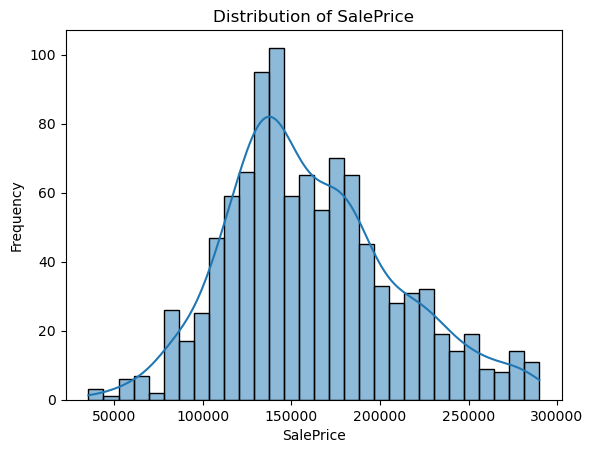

In [65]:
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

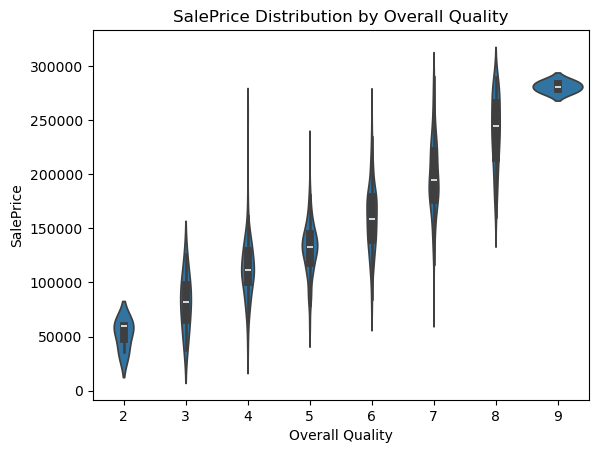

In [66]:
sns.violinplot(data=df, x='OverallQual', y='SalePrice', inner='box')
plt.title('SalePrice Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

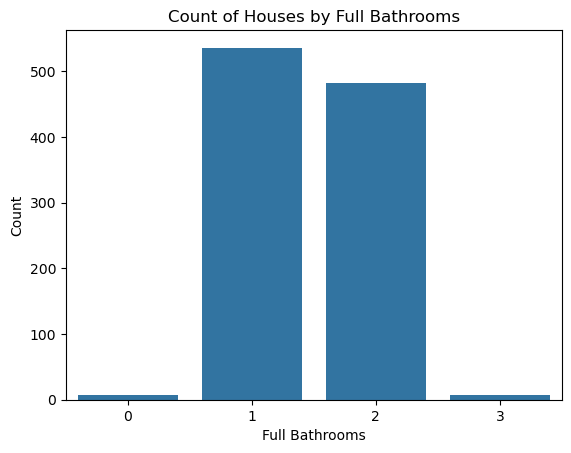

In [67]:
sns.countplot(data=df, x='FullBath')
plt.title('Count of Houses by Full Bathrooms')
plt.xlabel('Full Bathrooms')
plt.ylabel('Count')
plt.show()

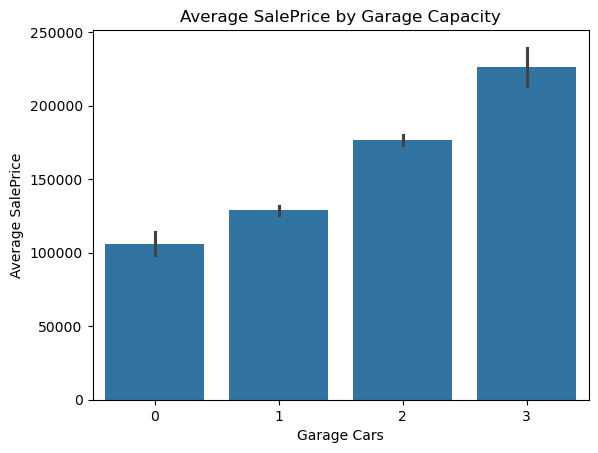

In [68]:
sns.barplot(data=df, x='GarageCars', y='SalePrice', estimator=np.mean)
plt.title('Average SalePrice by Garage Capacity')
plt.xlabel('Garage Cars')
plt.ylabel('Average SalePrice')
plt.show()

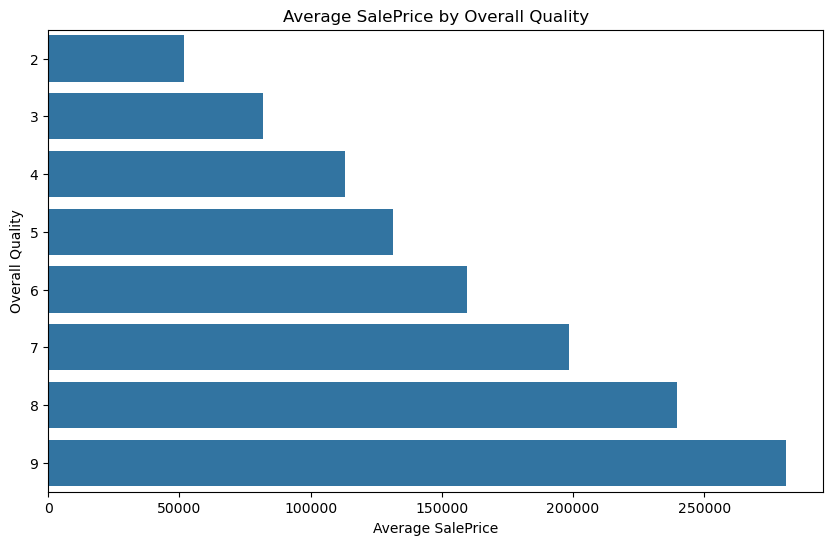

In [69]:
avg_prices = df.groupby('OverallQual')['SalePrice'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices.values, y=avg_prices.index, orient='h')
plt.title('Average SalePrice by Overall Quality')
plt.xlabel('Average SalePrice')
plt.ylabel('Overall Quality')
plt.show()

In [70]:
encoded_df.shape

(1460, 248)

In [71]:
df_no_outliers.shape

(1033, 38)

In [72]:
df_f_cat=encoded_df.loc[df_no_outliers.index,:]

In [73]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [74]:
#MinMaxScaler scales features to a fixed range, typically [0,1](but can be customized)

In [75]:
columns_to_scale = [
    'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'
]

In [76]:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df_no_outliers.copy()
df_minmax_scaled[columns_to_scale] = minmax_scaler.fit_transform(df_no_outliers[columns_to_scale])


In [77]:
df_minmax_scaled.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,0.440000,8450,0.714286,5,0.951613,0.883333,0.494949,0.439601,...,0.000000,0.393548,0,0,0,0,0,2,2008,0.680002
1,2,20,0.640000,9600,0.571429,8,0.733871,0.433333,0.000000,0.608966,...,0.712919,0.000000,0,0,0,0,0,5,2007,0.573990
2,3,60,0.480000,11250,0.714286,5,0.935484,0.866667,0.409091,0.302615,...,0.000000,0.270968,0,0,0,0,0,9,2008,0.738897
3,4,70,0.373333,9550,0.714286,5,0.241935,0.333333,0.000000,0.134496,...,0.000000,0.225806,272,0,0,0,0,2,2006,0.411046
4,5,60,0.693333,14260,0.857143,5,0.927419,0.833333,0.883838,0.407846,...,0.459330,0.541935,0,0,0,0,0,12,2008,0.842946


In [78]:
#It transforms the data so that it has a mean of 0 and a standard deviation of 1.

In [79]:
standard_scaler = StandardScaler()
df_standard_scaled = df_no_outliers.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df_no_outliers[columns_to_scale])

In [80]:
df_standard_scaled.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,-0.165000,8450,0.989570,5,1.143950,0.935279,1.462913,0.815949,...,-0.780942,0.755738,0,0,0,0,0,2,2008,0.995315
1,2,20,0.941786,9600,0.116619,8,0.236294,-0.350943,-0.595055,1.538267,...,2.087800,-0.765321,0,0,0,0,0,5,2007,0.428619
2,3,60,0.056357,11250,0.989570,5,1.076716,0.887641,1.105918,0.231722,...,-0.780942,0.281966,0,0,0,0,0,9,2008,1.310147
3,4,70,-0.533929,9550,0.989570,5,-1.814335,-0.636770,-0.595055,-0.485285,...,-0.780942,0.107418,272,0,0,0,0,2,2006,-0.442415
4,5,60,1.236929,14260,1.862522,5,1.043099,0.792365,3.079887,0.680515,...,1.067375,1.329253,0,0,0,0,0,12,2008,1.866349


In [81]:
final_df=pd.concat([df_standard_scaled,df_f_cat],axis=1)

In [82]:
final_df.shape

(1033, 286)

In [83]:
final_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=286)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:


X1=final_df.drop(["SalePrice"],axis=1)
y=final_df["SalePrice"]



In [87]:
from sklearn.model_selection import train_test_split

In [88]:


X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)



     

In [89]:


Linreg=LinearRegression()



     


LM=Linreg.fit(X_train,y_train) # training



     


In [90]:


LM.score(X_train,y_train)



     


0.9368878876804806

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
y_pred_lm = LM.predict(X_test)

In [93]:
mae = mean_absolute_error(y_test, y_pred_lm)
mse = mean_squared_error(y_test, y_pred_lm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lm)

# Print metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.2709324251101912
Mean Squared Error (MSE): 0.13843253840457118
Root Mean Squared Error (RMSE): 0.37206523407135367
R² Score: 0.8621825740193572


In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
DecTree=DecisionTreeRegressor()

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:


RandFor=RandomForestRegressor(n_estimators=5000)



     


In [98]:
dt_M=DecTree.fit(X_train,y_train)#training

In [99]:
rf_M=RandFor.fit(X_train,y_train)#training

In [100]:
dt_M.score(X_train,y_train)

1.0

In [101]:


rf_M.score(X_train,y_train)



     


0.9779694366984782

In [102]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [103]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [104]:
lasso_reg.score(X_train, y_train)

0.8144688582473274

In [105]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [106]:
ridge_reg.score(X_train, y_train)

0.9367731429770189

In [107]:
from sklearn.tree import DecisionTreeRegressor


In [108]:
DecTree=DecisionTreeRegressor()

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:


RandFor=RandomForestRegressor(n_estimators=5000)



     


In [111]:
dt_M=DecTree.fit(X_train,y_train)

In [112]:
rf_M=RandFor.fit(X_train,y_train)

In [113]:
dt_M.score(X_train,y_train)

1.0

In [114]:


rf_M.score(X_train,y_train)



     


0.9780838811262633

In [115]:
!pip install xgboost

In [116]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [117]:
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [118]:
ada.score(X_train, y_train)

0.8753414718705828

In [119]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [120]:
gbr.score(X_train, y_train)

0.9636357863229026

In [121]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [122]:
xgb.score(X_train, y_train)

0.9968832714236674